### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
lista_edad_altura = [[29,  1.66], [22, 1.83], [31, 1.80], [27, 1.75], [22,1.82], [35,1.79], [34,1.90], [26,1.78], [26, 1.64], [23, 1.74],[24,1.85], [28, 1.75], [23, 1.83],[32,1.74], [34, 1.57], [27, 1.58],[38,1.70],[22, 1.79]]
dt = pd.DataFrame(lista_edad_altura)
dt

,0,1
0,29,1.66
1,22,1.83
2,31,1.80
3,27,1.75
4,22,1.82
5,35,1.79
6,34,1.90
7,26,1.78
8,26,1.64
9,23,1.74


¿Es una buena técnica para este tipo de problemas? ¿Por qué?

En mi opnión considero que no es una buena técnica dibujar con un plot este tipo de datos, ya que va de un punto a otro y no nos esta aportando información el gráfico. 

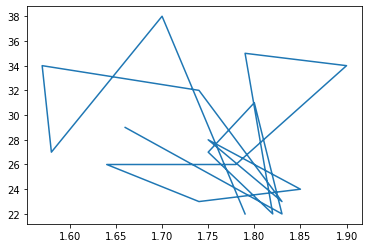

In [4]:

plt.plot(dt[1],dt[0])

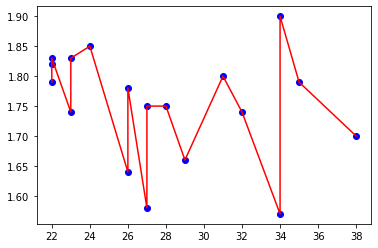

In [6]:
#Con esto podemos ver mejor los puntos y lo que hace la linea de manera ordenada. 
age, height = zip(*sorted(zip(dt[0], dt[1])))
plt.plot(age, height, color='red')
plt.scatter(age, height, color='b')

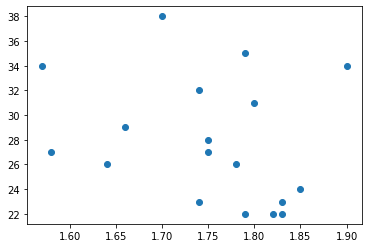

In [5]:
#Dibujar con puntos para que pueda enterse mejor, aún asi no se aprecia ninguna relación 
plt.scatter(dt[1],dt[0])

¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?

In [8]:
X= dt[[0]]
Y= dt[1]

In [13]:
X= np.array(dt[0]).reshape(-1,1)
X.shape

(18, 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [11]:

lm= LinearRegression()

In [12]:
lm.fit(X_train, y_train)

LinearRegression()

Train errors: [0.0, 0.0, 0.0076055555555555425, 0.00580983827493261, 0.005712578397212545, 0.004922927156764013, 0.007489654017857135, 0.007305638586956521, 0.007815489366319438, 0.007047257995735606, 0.007323348684625572, 0.0068646591384358005, 0.006383315063315068]
Val errors: [0.02254999999999999, 0.6774749999999993, 0.0027131944444444486, 0.00896617123531506, 0.011649852872439881, 0.010803001625679884, 0.014738854721069356, 0.014354434221408316, 0.013017945116758349, 0.012822949791099337, 0.012788544826559948, 0.013409493174687384, 0.01339244684241982]


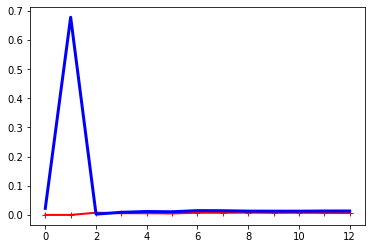

In [38]:
train_errors, val_errors = [], []
for m in range(1, len(X_train)): 
    x = X_train[:m]
    y = y_train[:m]
    lm.fit(x, y) 

    y_train_predict = lm.predict(x) 
    predictions = lm.predict(X_test)


    train_errors.append(mean_squared_error(y, y_train_predict))
    val_errors.append(mean_squared_error(y_test, predictions))
print("Train errors:", train_errors)
print("Val errors:", val_errors)
plt.plot(train_errors, "r-+", linewidth=2, label="train")
plt.plot(val_errors, "b-", linewidth=3, label="val")

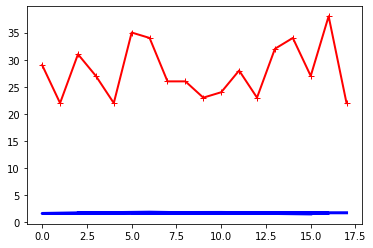

In [16]:
plt.plot(X, "r-+", linewidth=2)
plt.plot(y, "b-", linewidth=3)

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.09442628992628999
MSE: 0.01339244684241982
RMSE: 0.11572573975749656


Representa la matriz de correlación, ¿los datos están correlacionados?

Según lo indicado en la matrix, nos muestra que hay una fuerte correlación negativa entre los datos. 

<AxesSubplot:>

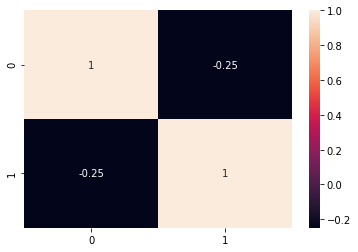

In [42]:
sns.heatmap(dt.corr(), annot= True)

In [55]:
print(lm.intercept_) 

1.8052334801762118


In [56]:
lm.coef_

array([-0.0009163])

In [17]:
lm.score(X,Y)*100

0.4288775110762755

In [48]:
#nuestro modelo
acierto= lm.score(X_train,y_train) *100
error = 1- acierto
print("Acierto:", acierto)
print("Error:",error)

Acierto: 0.7799511813909921
Error: 0.22004881860900793


In [50]:
#Nuestro modelo de predicción tiene un acierto negativo
acierto= lm.score(X_test,y_test) *100
error = 1- acierto
print("Acierto:", acierto)
print("Error:",error)

Acierto: -43.618732894582465
Error: 44.618732894582465


¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad?

In [51]:
#Multiplicar la edad por dos
X= X*2
X

array([[58],
       [44],
       [62],
       [54],
       [44],
       [70],
       [68],
       [52],
       [52],
       [46],
       [48],
       [56],
       [46],
       [64],
       [68],
       [54],
       [76],
       [44]], dtype=int64)

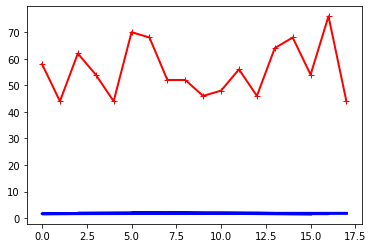

In [52]:
plt.plot(X, "r-+", linewidth=2)
plt.plot(y, "b-", linewidth=3)

train_errors [0.0, 2.465190328815662e-32, 0.00010555555555555672, 0.0002960616438356172, 0.0004264146868250531, 0.004121377912867278, 0.0038327017599492563, 0.0034028793418647103, 0.006799995508847571, 0.007469867335962716, 0.0071063193624557345, 0.006531607831504006, 0.006167659059996979]
-----
val_errors
 [0.003524999999999995, 0.007979081632653068, 0.006356944444444451, 0.00973676346406456, 0.008874861162294913, 0.015351884567770048, 0.014707879655851632, 0.014064750809634709, 0.015933496912759304, 0.016902591324880367, 0.01815566365006742, 0.017986765639199622, 0.018411364496045662]


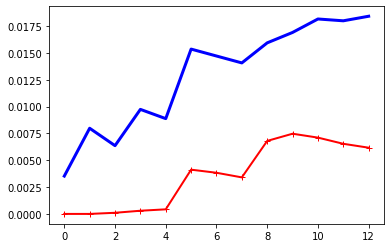

In [58]:
#Cada vez que lo ejecuto sale diferente
train_errors, val_errors = [], []
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)    
for m in range(1, len(X_train)): 
    x = X_train[:m]
    y = y_train[:m]
    lm.fit(x, y) 

    y_train_predict = lm.predict(x)
    y_val_predict = lm.predict(X_test)

    train_errors.append(mean_squared_error(y, y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_val_predict))
print("train_errors", train_errors)
print("-----\nval_errors\n", val_errors)
plt.plot(train_errors, "r-+", linewidth=2, label="train")
plt.plot(val_errors, "b-", linewidth=3, label="val")


In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.05129484029484027
MSE: 0.005411918586891557
RMSE: 0.07356574329734973


In [62]:
#Modelo de entrenamiento 
acierto= lm.score(X_train, y_train) * 100
error = 1- acierto
print("Acierto:", acierto)
print("Error:",error)

Acierto: 28.888041131171637
Error: -27.888041131171637


In [63]:
#Modelo de test
acierto= lm.score(X_test, y_test) * 100 
error = 1- acierto
print("Acierto:", acierto)
print("Error:",error)

Acierto: -423.23593594446
Error: 424.23593594446


In [65]:
#¿Qué ocurre si la altura se multiplica por dos?
Y = Y*2
Y

0     3.32
1     3.66
2     3.60
3     3.50
4     3.64
5     3.58
6     3.80
7     3.56
8     3.28
9     3.48
10    3.70
11    3.50
12    3.66
13    3.48
14    3.14
15    3.16
16    3.40
17    3.58
Name: 1, dtype: float64

In [66]:
X= np.array(dt[0]).reshape(-1,1)
X.shape

(18, 1)

train_errors [0.0, 1.9721522630525295e-31, 0.01610640176600443, 0.012120785597381356, 0.019512857142857117, 0.01626086956521741, 0.014011437403400318, 0.01252646887725422, 0.012091117602510014, 0.017129671080734748, 0.015790676618132896, 0.015376299694189612, 0.018551156247855638]
-----
val_errors
 [0.08390000000000002, 0.08952400000000013, 0.039986686987412735, 0.041038253138719706, 0.04001755819515305, 0.03999605387523638, 0.04035513271334346, 0.04178089771743178, 0.04194333449634931, 0.038066814913322776, 0.03896079125222576, 0.03763853737059176, 0.0365127211749417]


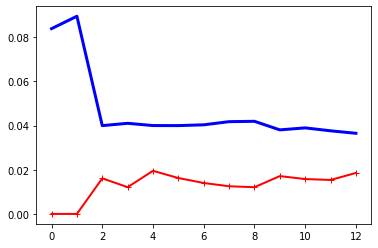

In [75]:
train_errors, val_errors = [], []
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)    
for m in range(1, len(X_train)): 
    x = X_train[:m]
    y = y_train[:m]
    lm.fit(x, y) 

    y_train_predict = lm.predict(x)
    y_val_predict = lm.predict(X_test)

    train_errors.append(mean_squared_error(y, y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_val_predict))
print("train_errors", train_errors)
print("-----\nval_errors\n", val_errors)
plt.plot(train_errors, "r-+", linewidth=2, label="train")
plt.plot(val_errors, "b-", linewidth=3, label="val")

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.711477886977887
MSE: 2.961230038980012
RMSE: 1.7208224890964239


In [77]:
lm.score(X,Y)* 100

1.0423254496812584

In [78]:
#Modelo de entrenamiento
acierto= lm.score(X_train, y_train)* 100
error = 1- acierto
print("Acierto:", acierto)
print("Error:",error)

Acierto: 3.5169935862640056
Error: -2.5169935862640056


In [79]:
#Modelo de test
acierto= lm.score(X_test, y_test)
error = 1- acierto
print("Acierto:", acierto)
print("Error:",error)


Acierto: -0.0973019135970461
Error: 1.097301913597046
